12.1. 编译器和解释器
- 考虑另一种选择符号式编程（symbolic programming），即代码通常只在完全定义了过程之后才执行计算。这个策略被多个深度学习框架使用，包括Theano和TensorFlow（后者已经获得了命令式编程的扩展）。一般包括以下步骤：

- 1.定义计算流程；

- 2.将流程编译成可执行的程序；

- 3.给定输入，调用编译好的程序执行。

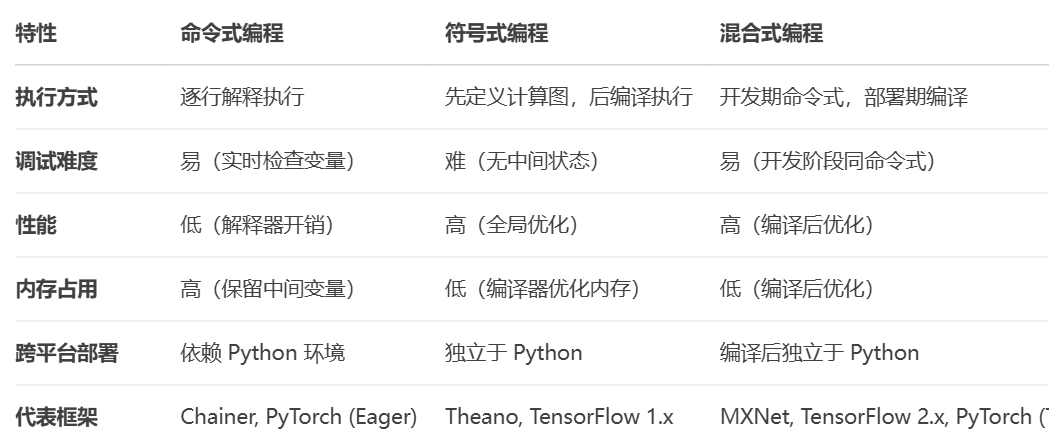

- 命令式编程使得新模型的设计变得容易，因为可以依据控制流编写代码，并拥有相对成熟的Python软件生态。

- 符号式编程要求我们先定义并且编译程序，然后再执行程序，其好处是提高了计算性能。